# Exploratory Analysis of Phone Prices

In [1]:
# to handle the data
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# execute the following statement after downloading the kaggle.json file as per the instructions at https://saturncloud.io/blog/how-to-import-kaggle-datasets-into-jupyter-notebook/
!mv /tmp/kaggle.json $HOME/.kaggle/

mv: cannot stat '/tmp/kaggle.json': No such file or directory


In [3]:
import kaggle
# ignore the warnings if any, if you are running it on the personal computer

In [4]:
DATA_DIR = './data/'

In [5]:
dataset_name = 'berkayeserr/phone-prices'
kaggle.api.dataset_download_files(dataset_name, path=DATA_DIR, unzip=True)

In [6]:
df = pd.read_csv(DATA_DIR+'cleaned_all_phones.csv')
df.head

<bound method NDFrame.head of             phone_name   brand           os  inches resolution  battery  \
0         Y6II Compact  Huawei  Android 5.1    5.00   720x1280     2200   
1             K20 plus      LG  Android 7.0    5.30   720x1280     2700   
2       P8 Lite (2017)  Huawei  Android 7.0    5.20  1080x1920     3000   
3         Redmi Note 4  Xiaomi  Android 6.0    5.50  1080x1920     4100   
4                  P10  Huawei  Android 7.0    5.10  1080x1920     3200   
...                ...     ...          ...     ...        ...      ...   
1507         vivo Y77t    Vivo   Android 13    6.64  1080x2388     5000   
1508               11x  Realme   Android 13    6.72  1080x2400     5000   
1509               GT5  Realme   Android 13    6.74  1240x2772     5240   
1510          GT5 240W  Realme   Android 13    6.74  1240x2772     4600   
1511  vivo iQOO Z7 Pro    Vivo   Android 13    6.78  1080x2400     4600   

     battery_type  ram(GB) announcement_date  weight(g)  storage(GB) 

In [7]:
print(f"Varibales in the Phone Prices dataframe: {list(df.columns)}")
print(f"Number of columns: {df.shape[1]}")

Varibales in the Phone Prices dataframe: ['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery', 'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)', 'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps', 'price(USD)']
Number of columns: 22


In [8]:
df['announcement_date'] = pd.to_datetime(df['announcement_date']) # transform the announcement_date as datetime instead of categorical

## identify the datatypes of the variables

In [9]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O'] # identify the categorical variables
bool_vars = [var for var in df.columns if df[var].dtype == 'bool'] # identify the boolean variables
temp_vars = [var for var in df.columns if df[var].dtype == 'datetime64[ns]'] # identify the temporal variables
num_vars = [var for var in df.columns if var not in cat_vars+bool_vars+temp_vars] # identify the temporal variables
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print(f"{cat_vars=}; {len(cat_vars)=}")
print(f"{bool_vars=}; {len(bool_vars)=}")
print(f"{temp_vars=}; {len(temp_vars)=}")
print(f"{num_vars=}; {len(num_vars)=}")
print(f"{vars_with_na=}; {len(vars_with_na)=}") #confirm that there is no missing data

cat_vars=['phone_name', 'brand', 'os', 'resolution', 'battery_type']; len(cat_vars)=5
bool_vars=['video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']; len(bool_vars)=10
temp_vars=['announcement_date']; len(temp_vars)=1
num_vars=['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']; len(num_vars)=6
vars_with_na=[]; len(vars_with_na)=0


## Summary Statistics

### Categorical variables

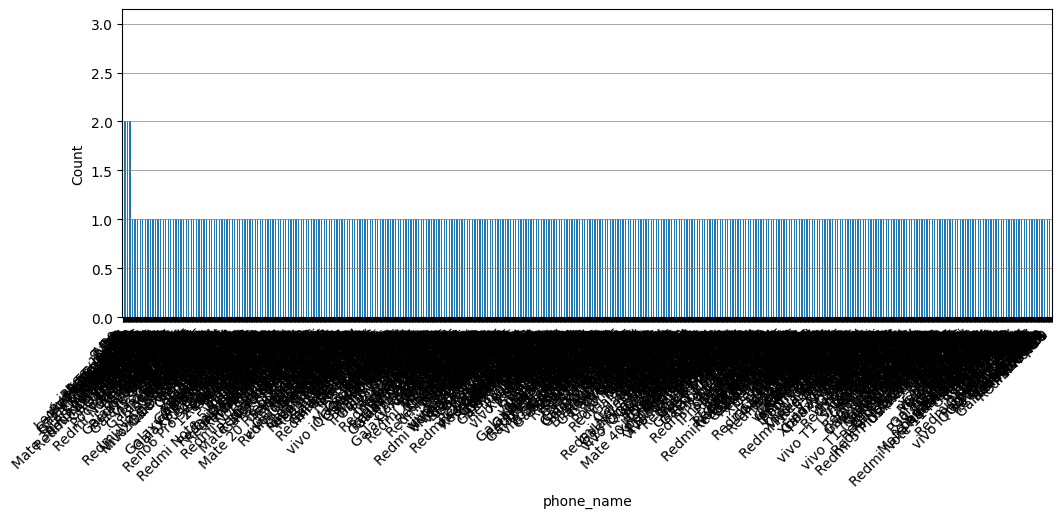

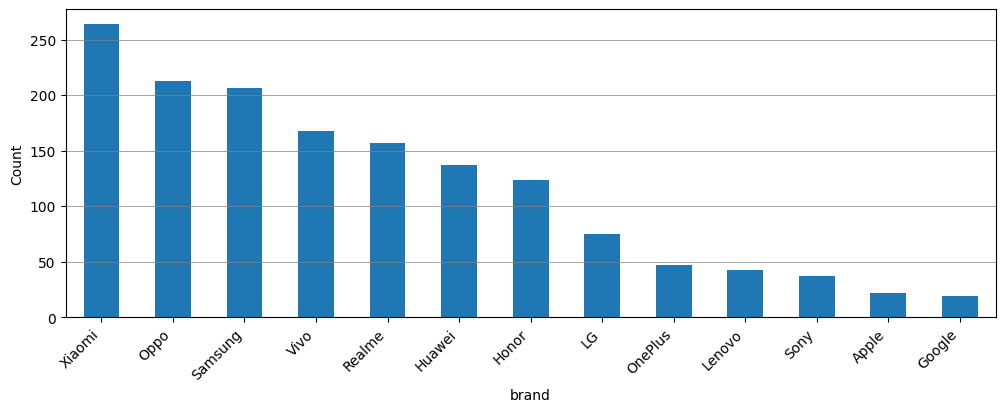

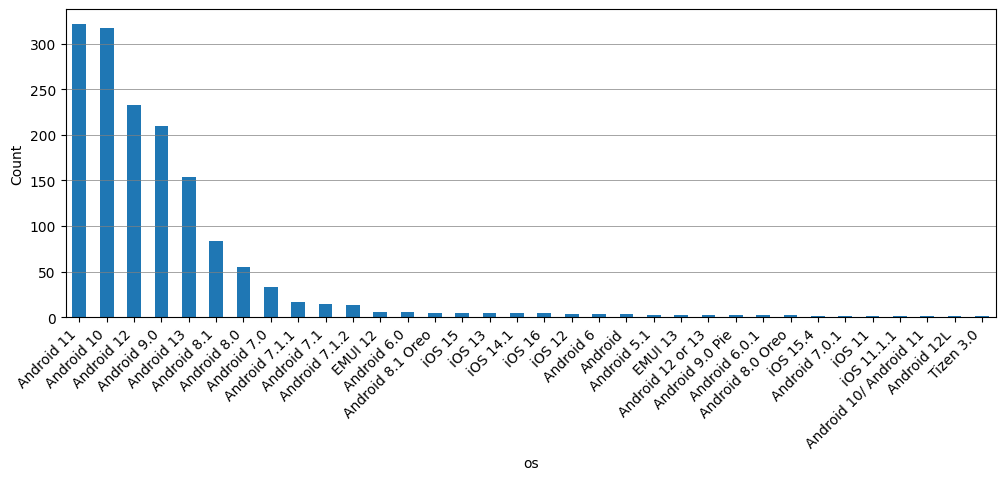

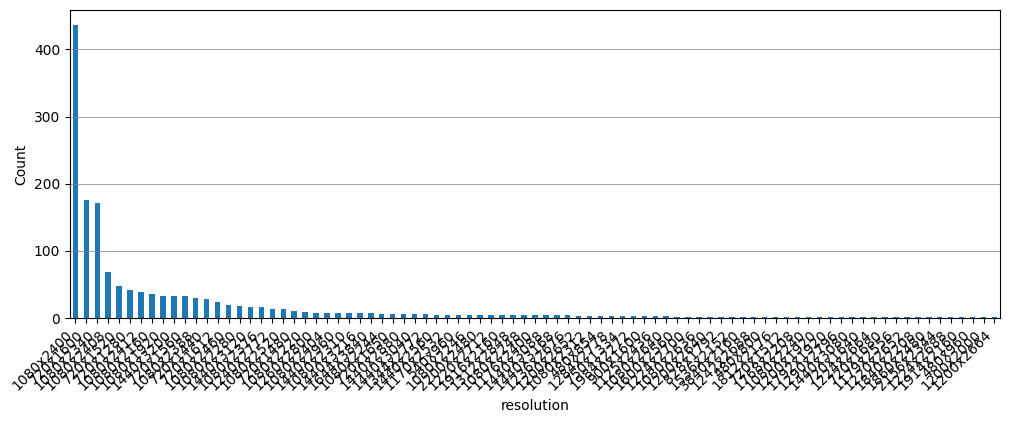

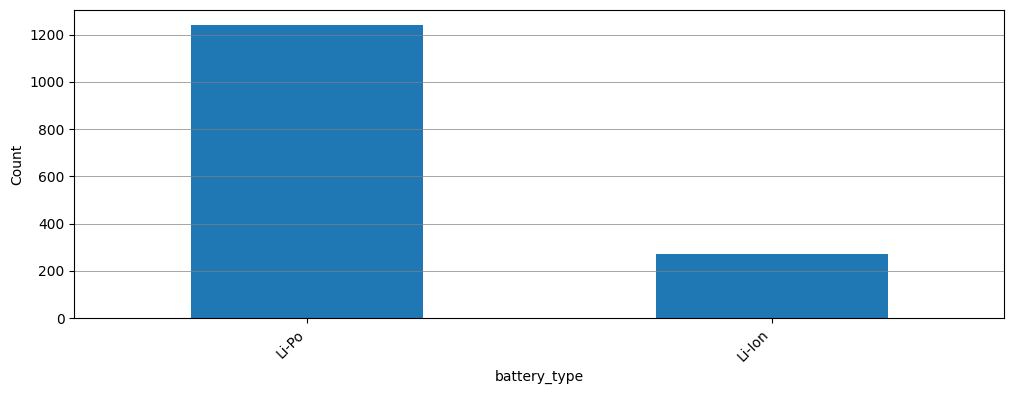

In [10]:
def print_cat_vars(df, var):
    df = df.copy()
    # plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
    # tmp = df[var].value_counts().sort_values(ascending=False).hist(bins=df[var].nunique)
    tmp = df[var].value_counts().sort_values(ascending=False).plot.bar(figsize=(12, 4))
    # tmp.set_xticklabels(tmp.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Turn off vertical grid lines
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()
    

for var in cat_vars:
    print_cat_vars(df, var)

In [11]:
df['phone_name'].value_counts().sort_values(ascending=False)

V30             3
9 Pro           2
8               2
7 Pro           2
10T             2
               ..
iPhone XR       1
K20 plus        1
A36             1
vivo V21        1
Redmi Note 9    1
Name: phone_name, Length: 1496, dtype: int64

### Initial Observations: Categorical Variables

1. The majority of the  phones names occurred only once in the dataset, and a few appeared twice.
2. **Xiaomi** brand phones are dominant, followed by **Oppo, Samsung** and **Vivo**, while **Apple** and **Google** brand phones are least in number.
3. Recent Android OS versions (**11, 10, 12** in the non-increasing order) are popular across the phones.
4. The predominant screen resolution across the phones is **1080x2400** which is more than the double of the next dominant screen resolution (**720x1600**).
5. There are only two battery types: **Li-Po** (Lithium-Polymer) and **Li-Ion** (Lithium-on). The former (Li-Po) battery is present in more than 80% of the phones.

## Numerical Variables

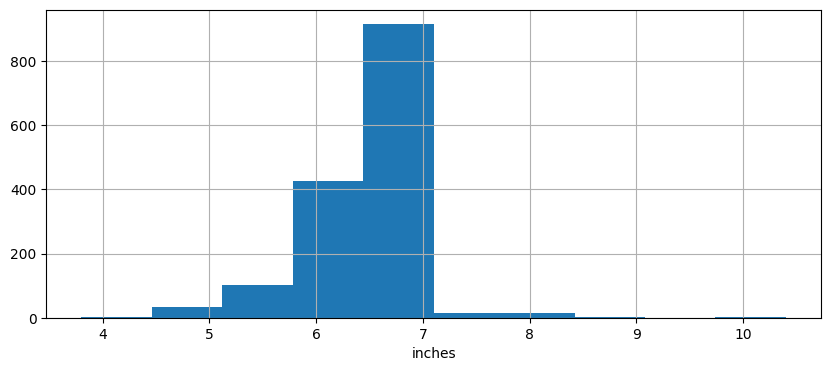

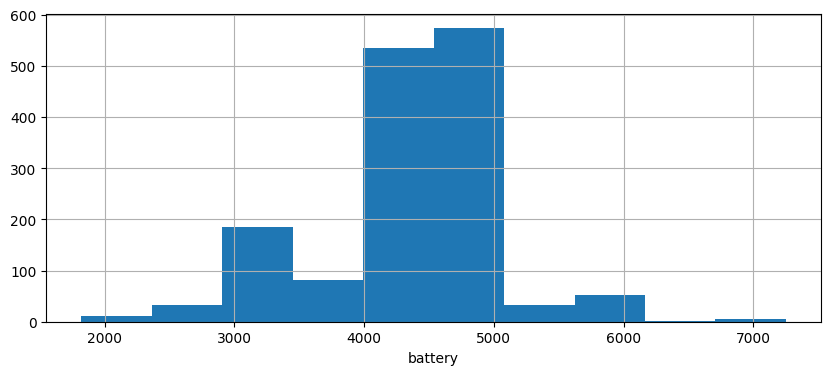

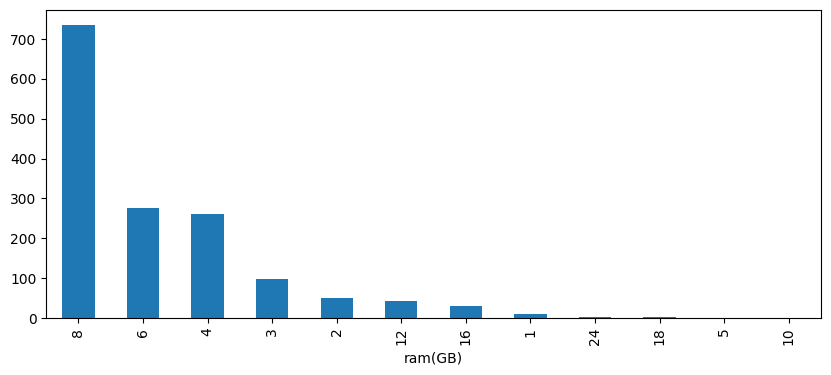

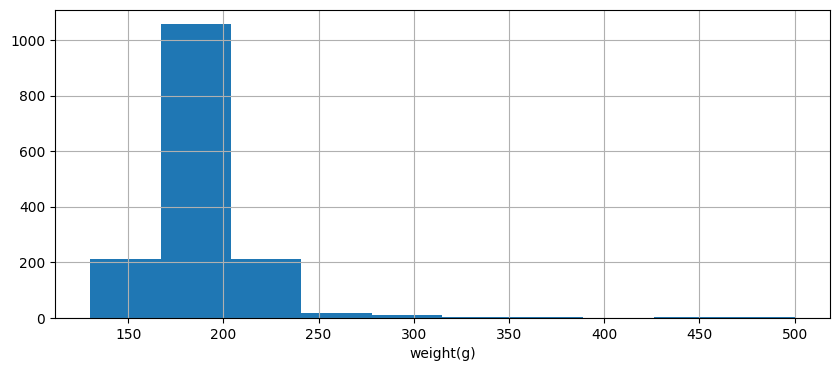

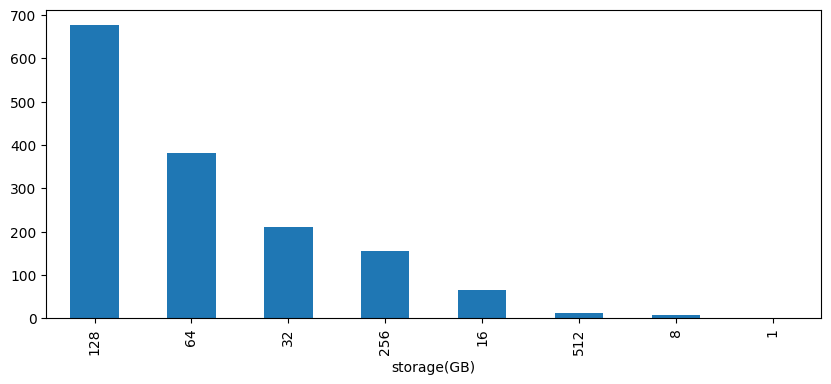

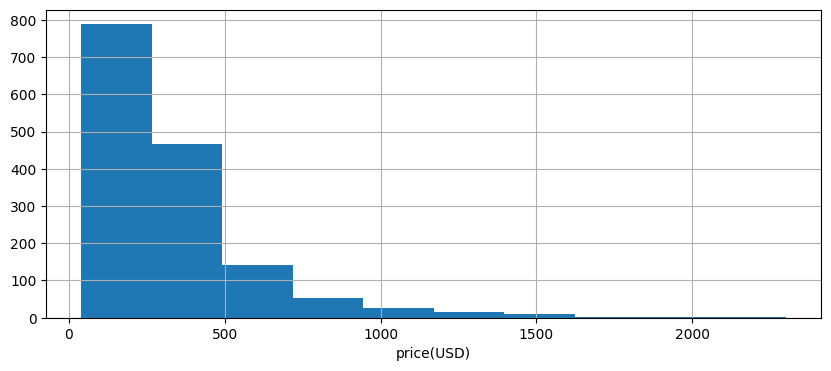

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [12]:
for var in num_vars:
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    if df[var].nunique() <= 15: # if the number of unique values are not more than 15, plot their frequency
        df[var].value_counts().sort_values(ascending=False).plot.bar()
    else:
        df[var].hist()
    plt.xlabel(var)
    plt.show()
df[num_vars].describe()

### Initial Observations: Numerical Variables

1. The median phone size is 6.5 inches, though the smallest phone size is 3.8 inches and the largest phone size is 10.4 inches.
2. The battery capacity ranges from 1821 mAh to 7250 mAh with median being 4500 mAh.
3. Majority of the phones possess 8 GB RAM, followed by 6 GB and 4 GB RAM.
4. The phones weigh from as light as 130 grams to as heavy as 500 grams, with 187 grams being the median weight.
5. Majority of the phones possess 128 GB storage space, followed by 64 GB and 32 GB storage space.
6. Phones are available at varying prices, from as low as 40 USD to as high as 2300 USD with median being 260 USD.

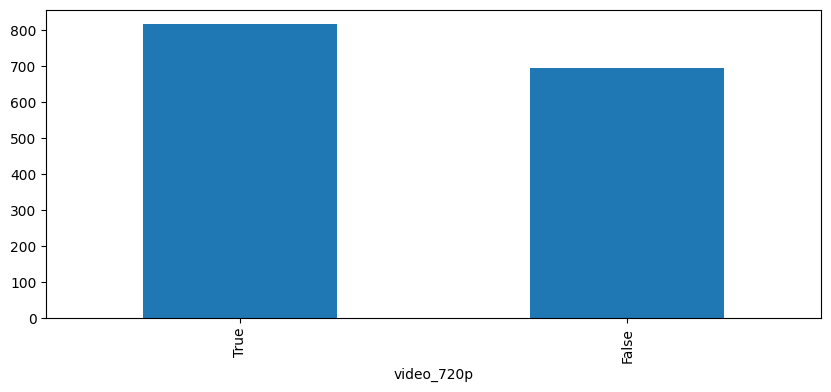

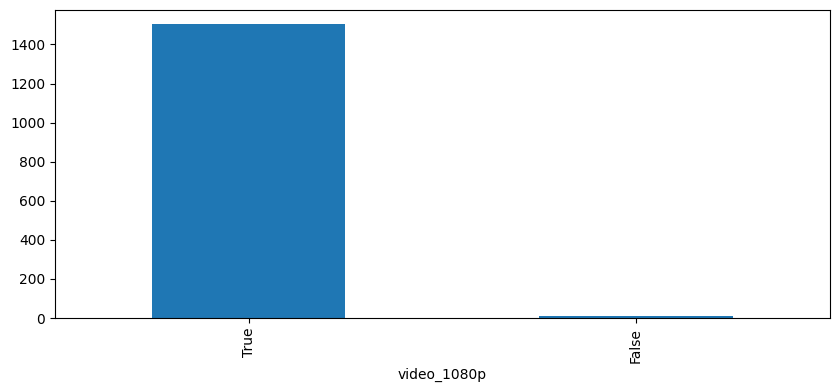

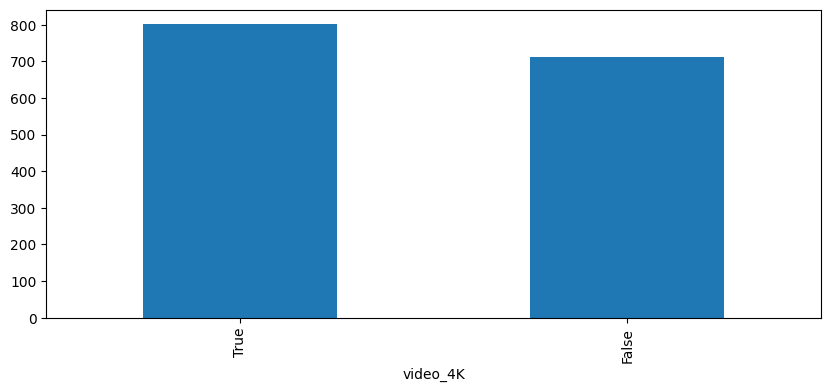

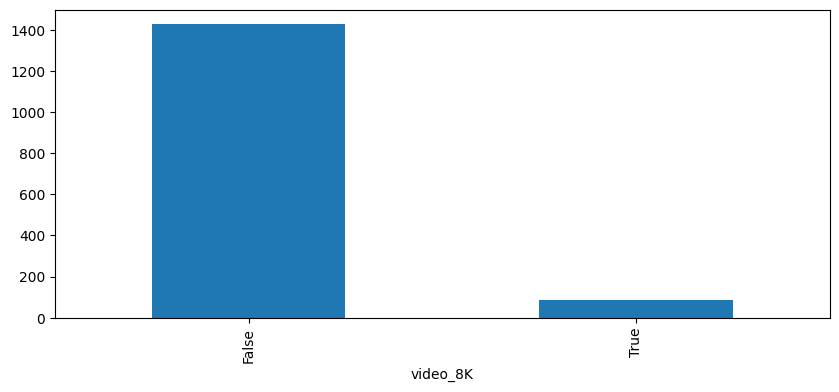

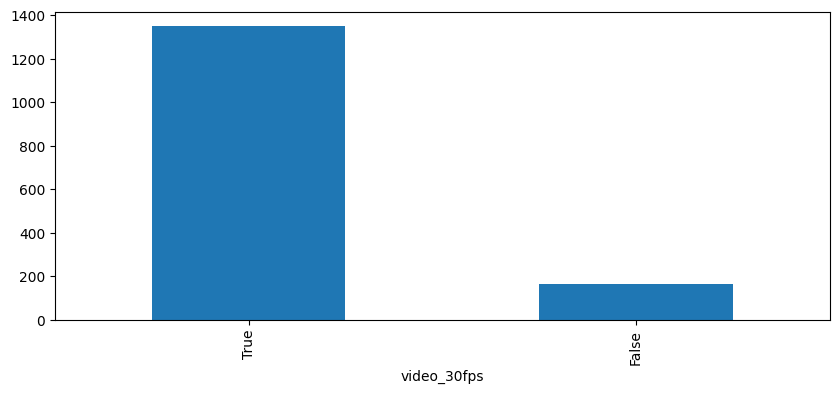

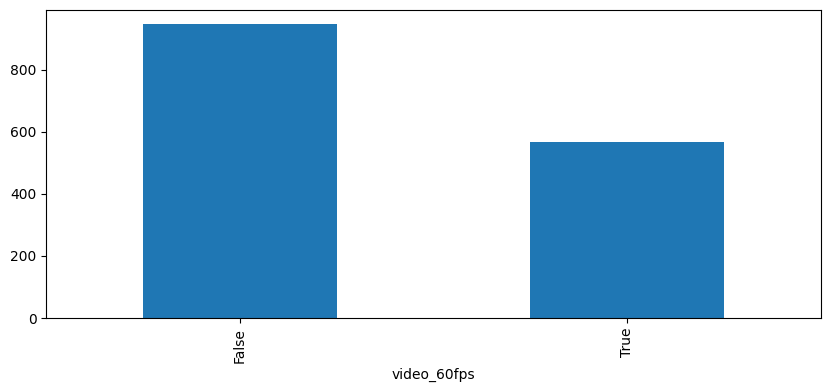

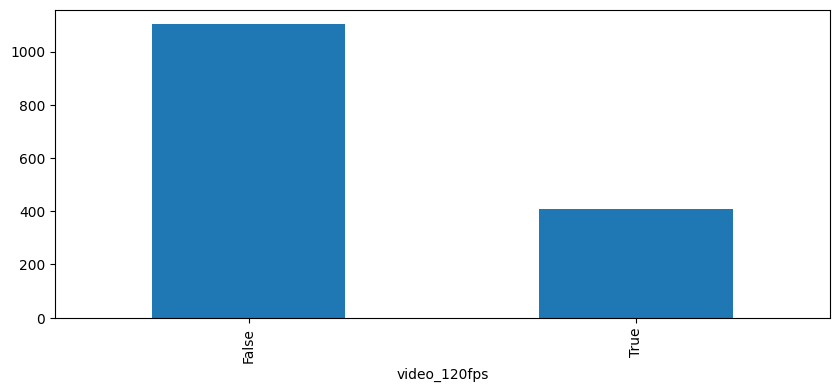

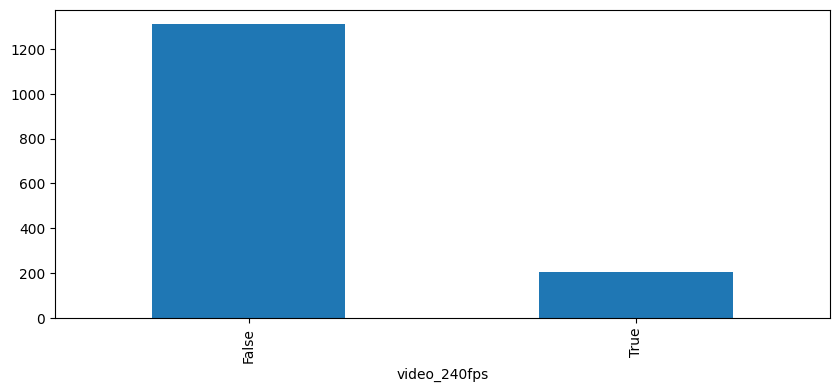

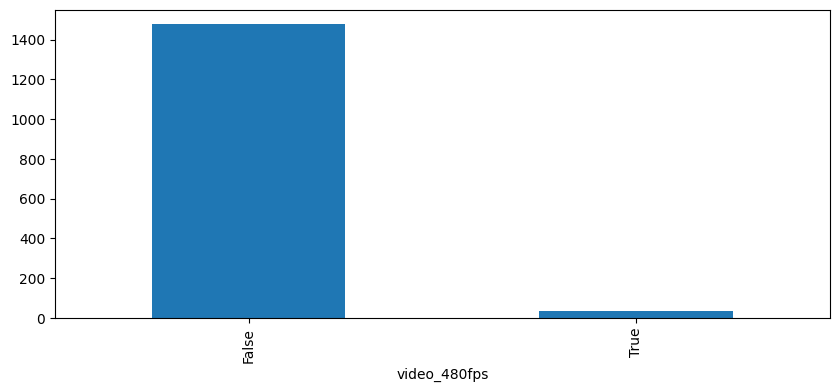

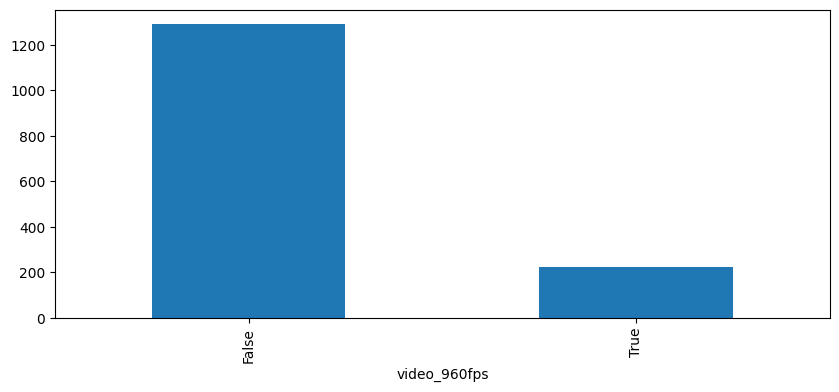

,video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps
count,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512
unique,2,2,2,2,2,2,2,2,2,2
top,True,True,True,False,True,False,False,False,False,False
freq,816,1503,801,1426,1348,946,1102,1310,1477,1290


In [13]:
for var in bool_vars:
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    df[var].value_counts().sort_values(ascending=False).plot.bar()
    plt.xlabel(var)
    plt.show()
df[bool_vars].describe()

Majority of the phones are supporting 720p, 1080p, 4K videos.
Majority of the phones are supporting 30fps.

## Combination with Temporal Variable

In [14]:
num_var = 'price(USD)'
cat_var = 'brand'
temp_var = 'announcement_date'

In [15]:
def plot_num_vars(num_var, cat_var='brand', temp_var='announcement_date'):
    """scatter plot the distribution of numerical variables over the time"""
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    uniq_brands = df[cat_var].unique()
    for brand in uniq_brands:
        category_data = df[df[cat_var] == brand]
        plt.scatter(category_data[temp_var], category_data[num_var], label=brand)
    plt.xlabel(temp_var)
    plt.ylabel(num_var)
    plt.legend(title='Brand', bbox_to_anchor=(1, 1)) #, loc='upper right')
    plt.show()

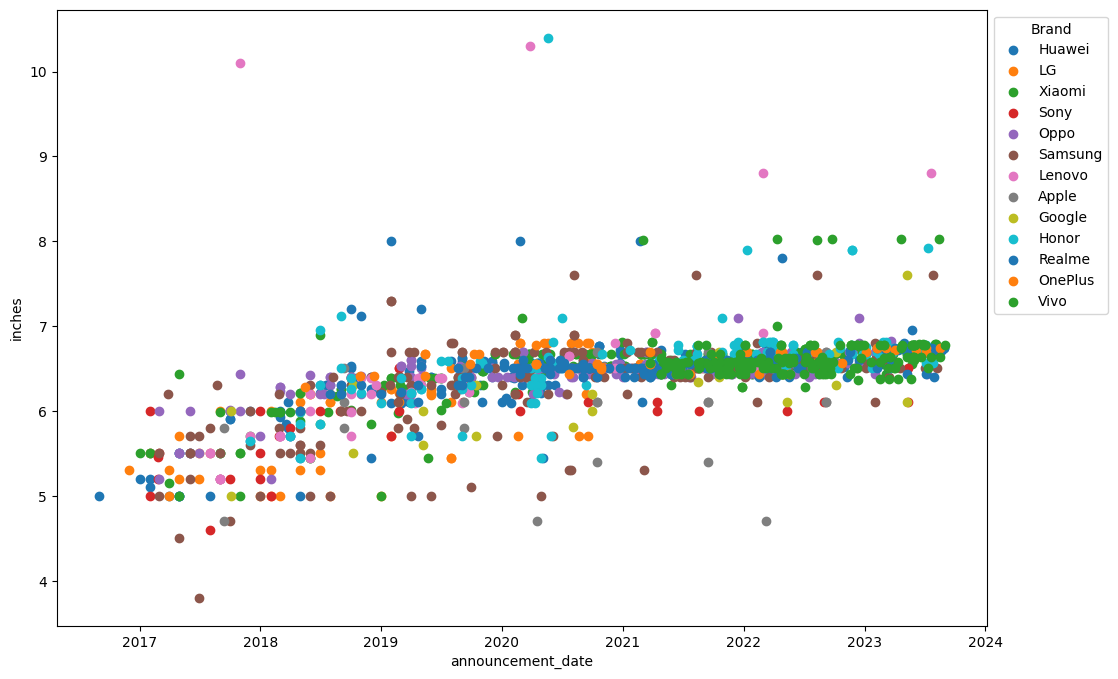

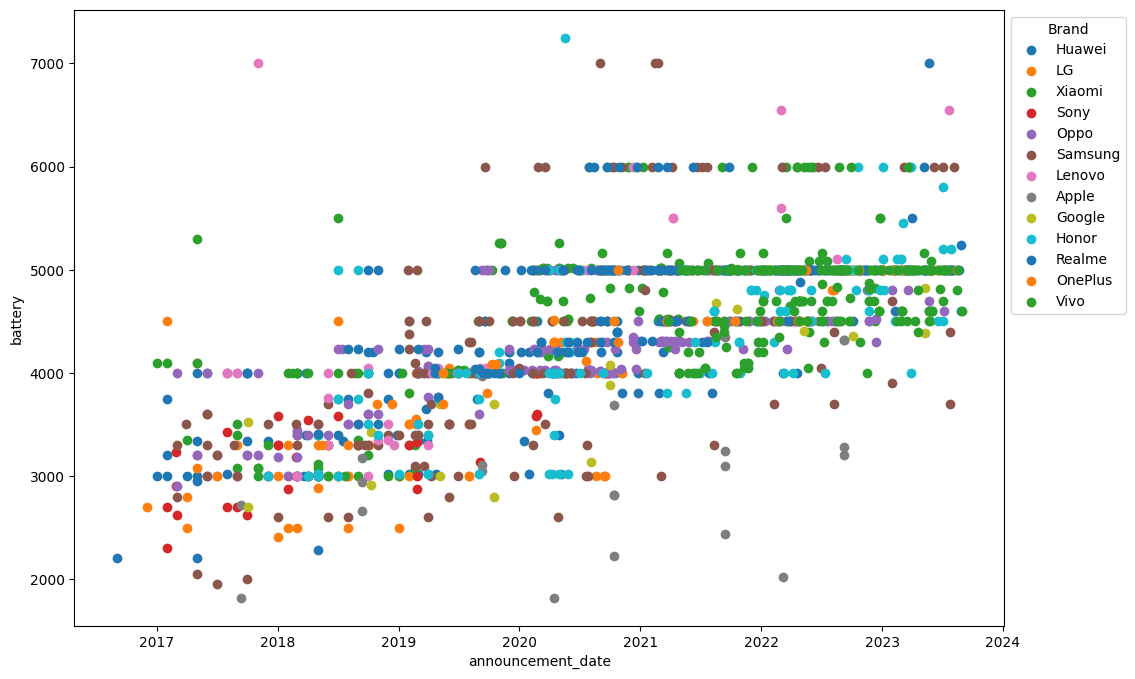

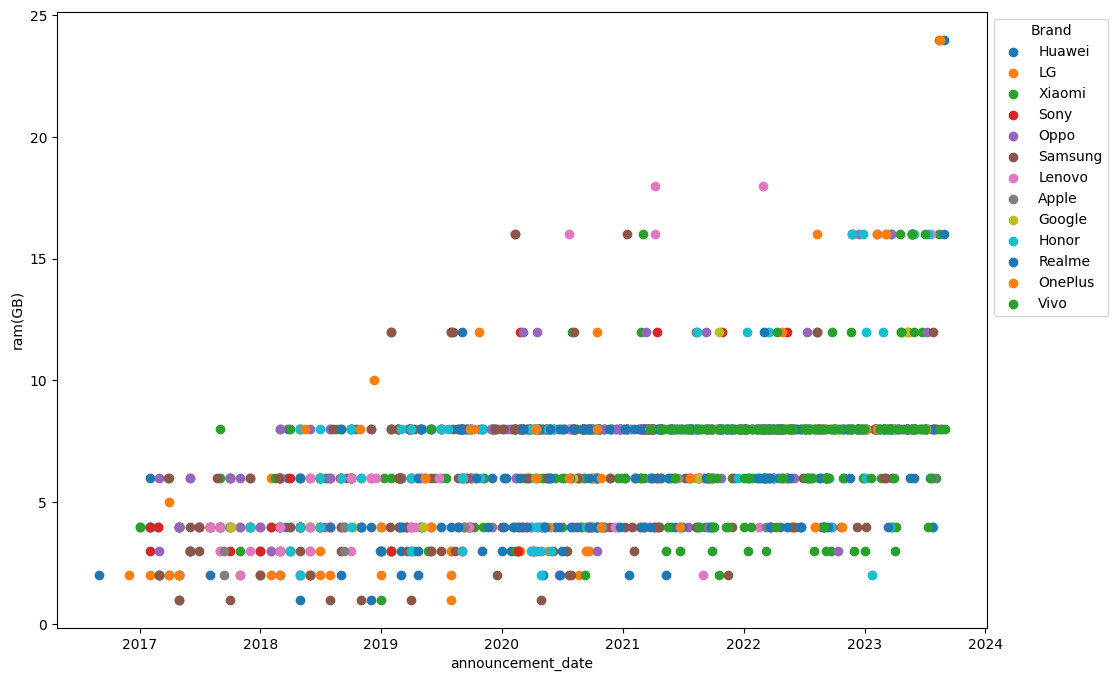

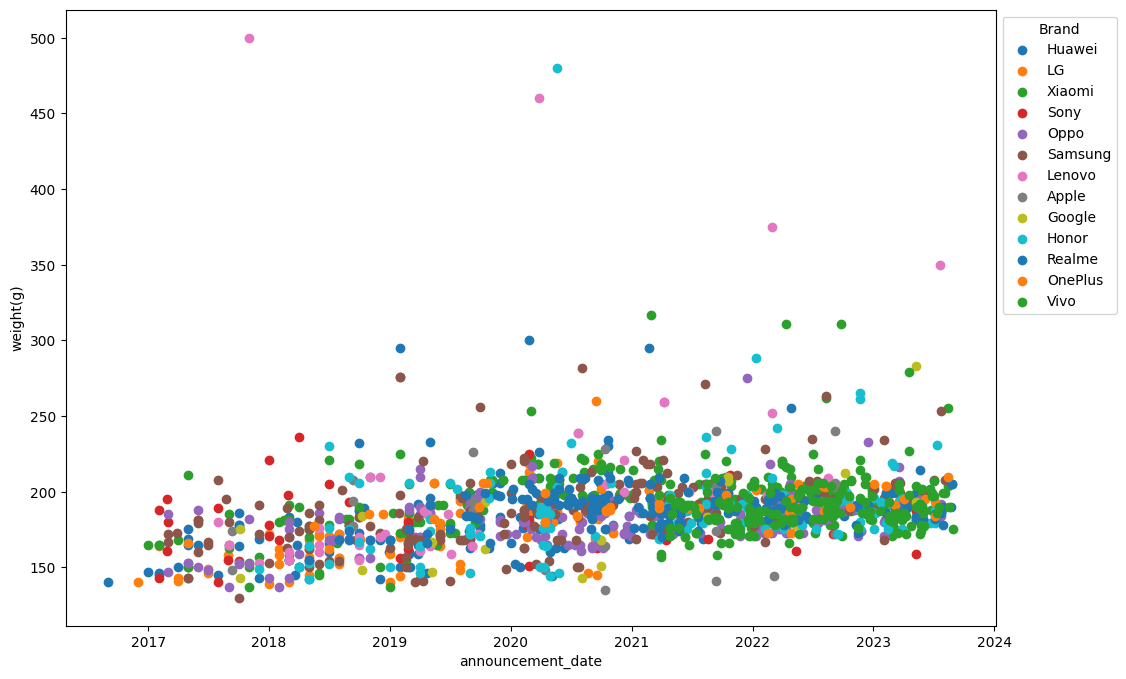

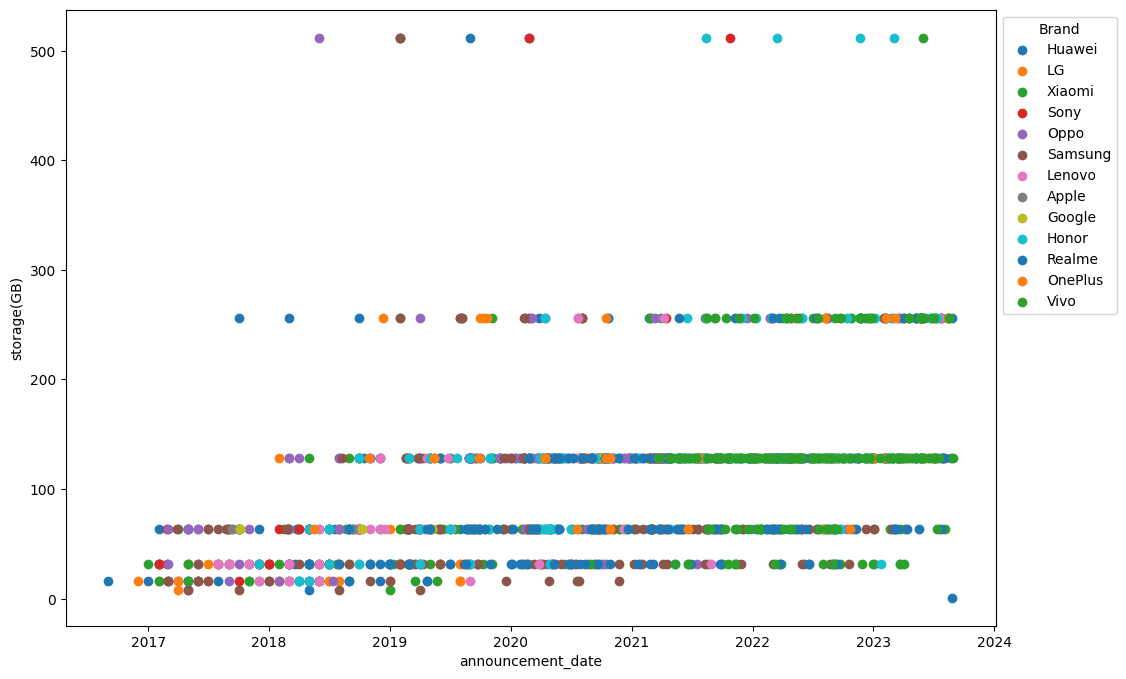

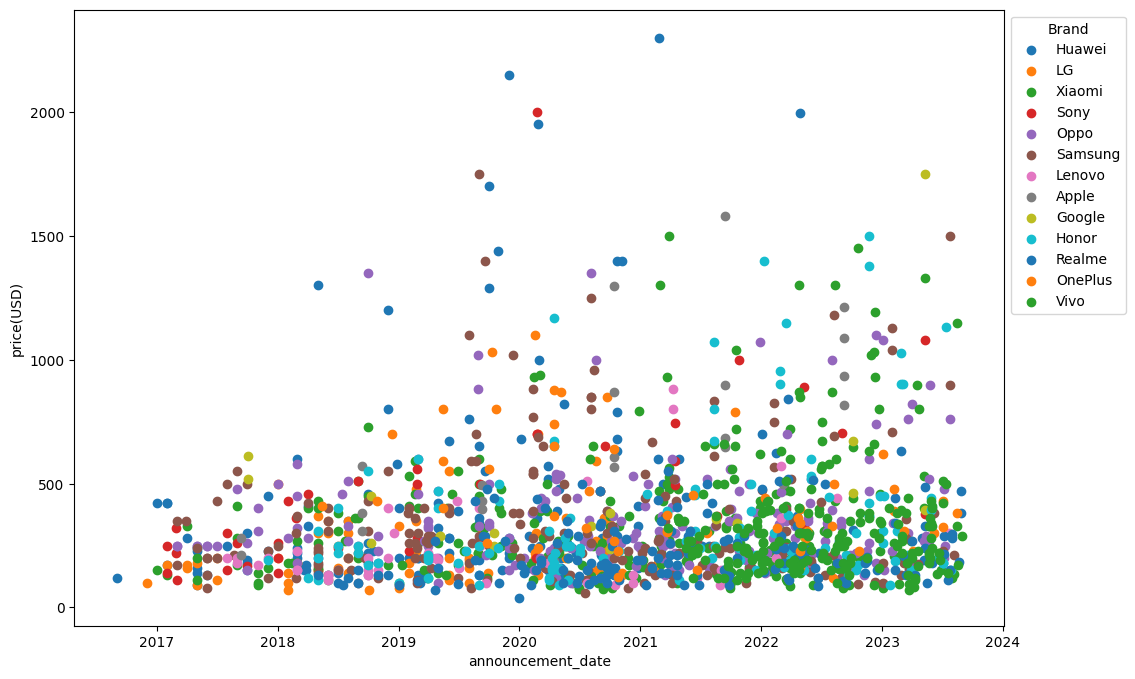

In [16]:
for num_var in num_vars:
    plot_num_vars(num_var)

## Interesting Questions and Answers

### Which phone is the cheapest and which phone is the costliest?

In [17]:
print(f"Cheapest phone:\n{df[df[num_var]==min(df[num_var])][[cat_var, 'phone_name', temp_var, num_var]].to_string(index=False)}") # Phone with lowest price and its announcement date
print(f"\nCostliest phone:\n{df[df[num_var]==max(df[num_var])][[cat_var, 'phone_name', temp_var, num_var]].to_string(index=False)}") # Phone with highest price and its announcement date

Cheapest phone:
 brand phone_name announcement_date  price(USD)
Realme        C2s        2020-01-01        40.0

Costliest phone:
 brand phone_name announcement_date  price(USD)
Huawei     P40 4G        2021-02-26      2300.0


### On an average, which brand phones are costliest?

In [18]:
df.groupby(by='brand')['price(USD)'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Apple,22.0,680.037273,371.505588,189.50,405.8075,588.50,890.2750,1580.09
Sony,37.0,470.782703,357.414467,110.00,240.0000,370.00,589.9900,2000.00
Google,19.0,448.082632,337.230952,238.00,290.0000,339.96,456.5000,1750.00
OnePlus,47.0,421.010723,210.299583,119.00,299.4950,369.60,489.9940,1030.00
Huawei,137.0,403.913650,419.520332,90.00,180.0000,250.00,420.0000,2300.00
Honor,124.0,358.317984,294.316605,90.00,180.0000,240.00,432.5000,1500.00
Samsung,206.0,347.762340,274.627639,60.00,179.2200,260.00,400.0000,1750.00
Oppo,213.0,341.332000,212.679309,100.00,215.0000,280.00,390.0000,1350.00
Vivo,168.0,338.002393,231.261368,90.00,191.4910,270.00,380.0000,1450.00


**Apple** brand phones are the costliest, followed by **Sony** and **Google**.
To note, **RealMe** brand phones are the cheapest.

### Which brand released more phone models (as identified through their phone names)?

In [19]:
df.groupby(by='brand')['phone_name'].describe().sort_values('count', ascending=False)

,count,unique,top,freq
brand,,,,
Xiaomi,264,264,Redmi Note 10 Pro,1
Oppo,213,213,F11,1
Samsung,206,206,Galaxy S20,1
Vivo,168,168,vivo S17t,1
Realme,157,157,5,1
Huawei,137,137,nova 2 plus,1
Honor,124,124,Magic V2,1
LG,75,75,Q51,1
OnePlus,47,47,8T+ 5G,1


**Xiaomi** brand produced the largest phone models followed by **Oppo** and **Samsung**

In [20]:
df.groupby(by='os')['brand'].describe()

,count,unique,top,freq
os,,,,
Android,3,2,Vivo,2
Android 10,317,12,Xiaomi,61
Android 10/ Android 11,1,1,Realme,1
Android 11,322,11,Xiaomi,67
Android 12,233,10,Vivo,50
Android 12 or 13,2,1,Xiaomi,2
Android 12L,1,1,Samsung,1
Android 13,154,10,Vivo,47
Android 5.1,2,2,Huawei,1


**If you are curious to ask any specific/interesting questions regarding/on this dataset, please feel free to write to me.**